In [9]:
import operator
from sklearn.cluster import DBSCAN
import pandas as pd
import os
import numpy as np
import random
from sklearn import metrics
import matplotlib.pyplot as plt
DATA_ROOT_DIRECTORY = './rev_Yelp/'

In [10]:
times_df = pd.read_json(os.path.join(DATA_ROOT_DIRECTORY, "yelp_academic_dataset_fill0all.json")).reset_index(drop=True)
std_times_df = pd.read_json(os.path.join(DATA_ROOT_DIRECTORY, "yelp_academic_dataset_fill0all_stand.json")).reset_index(drop=True)
print(times_df)
print(std_times_df)


                  business_id     stars   ftscore  compliment_count  \
0      MTSW4McQd7CbVtyjqoe9mw  3.914286  3.230332                 0   
1      CF33F8-E6oudUQ46HnavjQ  4.000000  3.125000                 0   
2      bBDDEgkFA1Otx9Lfe7BZUQ  3.000000  2.531250                 0   
3      eEOYSgkmpB90uNA7lDOMRA  5.000000  9.375000                 0   
4      il_Ro8jwPlHresjw9EGmBg  5.000000  1.750000                 0   
...                       ...       ...       ...               ...   
31352  w_4xUt-1AyY2ZwKtnjW0Xg  4.134454  2.461778                 0   
31353  l9eLGG9ZKpLJzboZq-9LRQ  3.500000  6.855469                 0   
31354  cM6V90ExQD6KMSU3rRB5ZA  4.333333  1.731481                 0   
31355  WnT9NIzQgLlILjPT0kEcsQ  4.333333  3.069444                 0   
31356  2O2K6SXPWv56amqxCECd4w  3.500000  3.445312                 0   

       review_count  
0                80  
1                 6  
2                10  
3                10  
4                28  
...            

In [17]:
def Colourlist_Generator(n):
    Rangelist = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    n=int(n)
    Colours = []
    j = 1
    while j<=n:
        colour=""
        for i in range(6):
            colour += Rangelist[random.randint(0,14)]
        colour = "#"+colour
        Colours.append(colour)
        j=j+1
    return Colours

In [11]:
x1 = times_df[['stars', 'ftscore', 'compliment_count', 'review_count']]
x2 = std_times_df[['stand_stars', 'stand_ftscore', 'stand_compliment_count', 'stand_review_count']]

In [125]:
db1 = DBSCAN(eps=1.1, min_samples=100).fit(x1)
db2 = DBSCAN(eps=0.05, min_samples=100).fit(x2)

In [126]:
lables1 = db1.labels_
times_df['cluster_db'] = lables1
#print(times_df.sort_values('cluster_db'))
center1 = times_df.groupby('cluster_db').mean().reset_index()
#print(center1)

/var/folders/rm/rw5gt9tx56zbsgf_6dc5lydh0000gn/T/ipykernel_38417/830149142.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  center1 = times_df.groupby('cluster_db').mean().reset_index()


In [127]:
lables2 = db2.labels_
std_times_df['cluster_db'] = lables2
#print(std_times_df.sort_values('cluster_db'))
center2 = std_times_df.groupby('cluster_db').mean().reset_index()
#print(center2)

/var/folders/rm/rw5gt9tx56zbsgf_6dc5lydh0000gn/T/ipykernel_38417/4097634695.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  center2 = std_times_df.groupby('cluster_db').mean().reset_index()


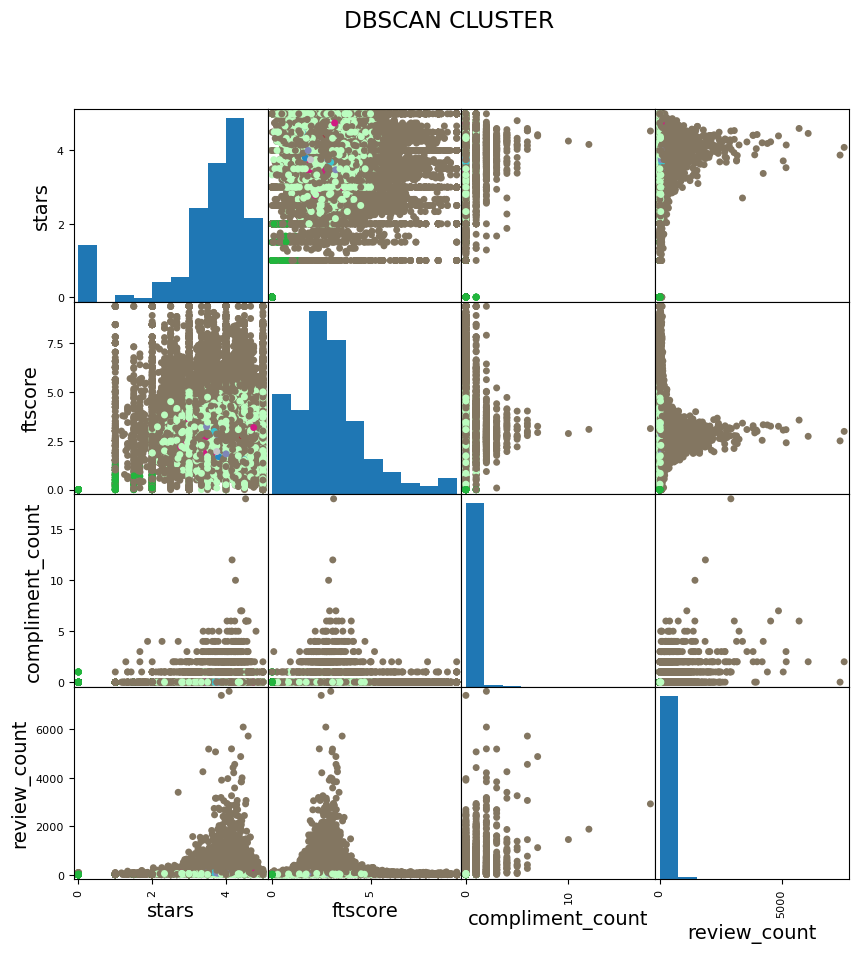

In [128]:
pd.plotting.scatter_matrix(x1, c=colors[times_df.cluster_db], alpha=1, figsize=(10,10), s=100)
plt.suptitle("DBSCAN CLUSTER")
plt.show()

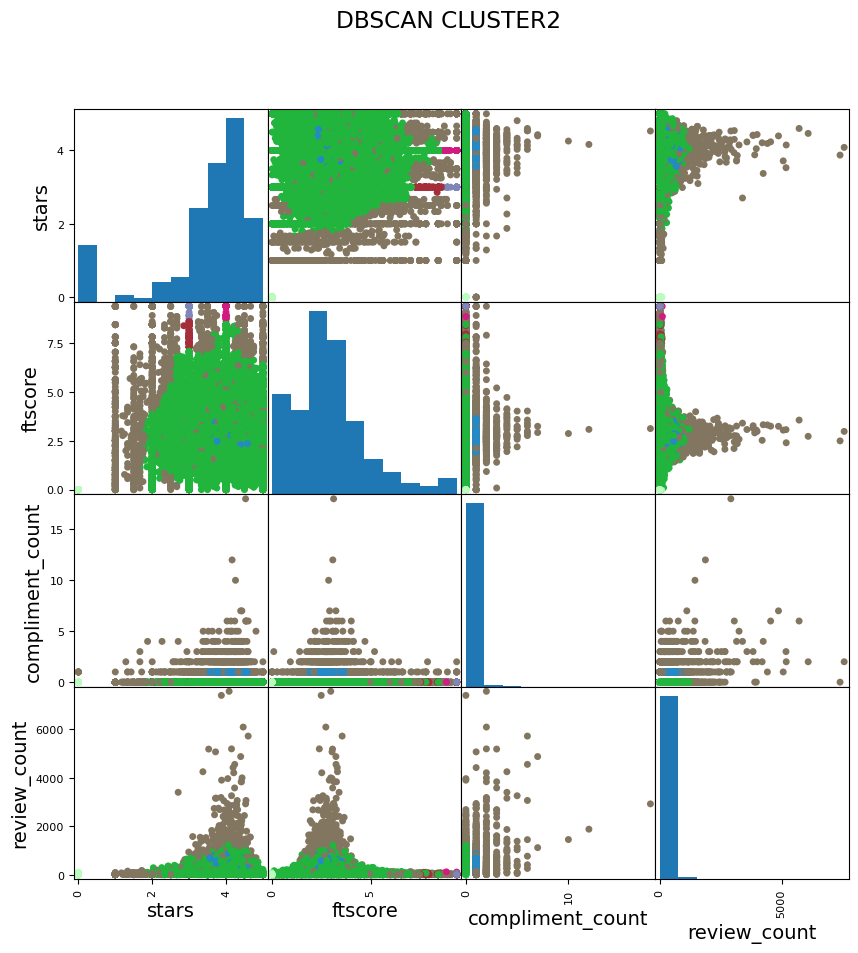

In [129]:
pd.plotting.scatter_matrix(x1, c=colors[std_times_df.cluster_db], alpha=1, figsize=(10,10), s=100)
plt.suptitle("DBSCAN CLUSTER2")
plt.show()

In [ ]:
plt.rcParams['font.size']=14
colors = np.array(Colourlist_Generator(10000))
plt.scatter(center.stars, center.ftscore, linewidths=3, marker='+', s=300, c='black')
plt.show